In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_Columns', None)
pd.set_option('display.max_rows', None)

In [2]:
cr = pd.read_csv(r"CreditRisk.csv")

In [3]:
cr.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,4.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
cr.shape

(981, 13)

In [5]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
cr.Gender = cr.Gender.fillna('Male')
cr.Married = cr.Married.fillna('No')
cr.Dependents = cr.Dependents.fillna(0)
cr.Self_Employed = cr.Self_Employed.fillna('Yes')
cr.LoanAmount = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History = cr.Credit_History.fillna(0)

In [7]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
cr = cr.drop(['Loan_ID'], axis = 1)

In [9]:
cr.shape

(981, 12)

In [10]:
cr.Loan_Status = cr.Loan_Status.replace({'Y':1, 'N':0})

In [11]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        981 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 92.1+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
cr[cr.select_dtypes(include=['object']).columns] = cr[cr.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [14]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int32  
 1   Married            981 non-null    int32  
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    int32  
 4   Self_Employed      981 non-null    int32  
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    int32  
 11  Loan_Status        981 non-null    int64  
dtypes: float64(5), int32(5), int64(2)
memory usage: 72.9 KB


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
cr_train, cr_test = train_test_split(cr, test_size= .2)

In [17]:
cr_train_x = cr_train.iloc[: , 0:-1]
cr_train_y = cr_train.iloc[: , -1]

In [18]:
cr_test_x = cr_test.iloc[: , 0:-1]
cr_test_y = cr_test.iloc[: , -1]

In [19]:
cr_test_x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,1,1,0.0,0,0,9083,0.000000,228.00000,360.000000,1.0,1
872,1,1,0.0,0,0,3007,3725.000000,151.00000,360.000000,1.0,0
527,1,1,1.0,1,0,5285,1430.000000,161.00000,360.000000,0.0,1
680,1,1,0.0,1,0,4700,0.000000,135.00000,360.000000,0.0,1
472,1,1,4.0,0,0,4691,0.000000,100.00000,360.000000,1.0,1
539,1,1,4.0,0,0,6417,0.000000,157.00000,180.000000,1.0,0
99,1,1,0.0,0,0,1759,3541.000000,131.00000,360.000000,1.0,1
195,1,1,1.0,0,0,3125,2583.000000,170.00000,360.000000,1.0,1
571,1,1,0.0,0,0,5116,1451.000000,165.00000,360.000000,0.0,2
90,1,1,0.0,0,0,2958,2900.000000,131.00000,360.000000,1.0,1


In [20]:
cr_test_y

350    1
872    1
527    1
680    0
472    1
539    1
99     1
195    0
571    0
90     1
455    1
788    0
823    1
552    1
729    1
631    1
639    0
708    0
813    1
18     0
192    0
104    1
363    1
877    1
804    1
577    1
290    1
203    1
914    1
816    1
477    0
250    0
125    1
251    0
495    1
436    1
197    1
642    1
45     1
338    0
277    1
494    0
369    0
58     1
109    1
653    1
939    0
154    1
288    1
64     0
795    1
368    1
768    1
230    1
361    1
694    0
611    1
345    1
910    1
173    1
897    1
902    1
617    1
375    1
215    1
640    1
820    1
177    0
838    0
490    1
200    1
467    1
656    1
60     1
967    1
805    1
864    0
859    0
43     1
54     0
529    1
19     1
715    0
310    1
469    0
971    1
489    0
728    1
814    1
659    1
840    1
625    1
952    1
487    0
545    1
698    0
282    1
264    1
291    0
189    1
829    1
69     0
421    0
462    1
757    1
574    0
921    1
671    1
88     1
187    1
94     1
8

In [21]:
cr_train_x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
940,1,1,1.0,1,1,2600,618.000000,122.00000,360.000000,1.0,1
396,0,0,0.0,0,0,3180,0.000000,71.00000,360.000000,0.0,2
306,0,0,0.0,0,0,3762,1666.000000,135.00000,360.000000,1.0,0
543,1,1,1.0,1,0,2239,2524.000000,128.00000,360.000000,1.0,2
783,0,1,1.0,0,0,3564,0.000000,79.00000,360.000000,1.0,0
873,0,0,1.0,0,1,1850,4583.000000,81.00000,360.000000,0.0,0
711,1,1,0.0,0,0,3500,3250.000000,140.00000,360.000000,1.0,1
801,1,1,2.0,0,0,9167,0.000000,235.00000,360.000000,1.0,1
593,1,1,0.0,0,0,3859,3300.000000,142.00000,180.000000,1.0,0
499,1,0,0.0,0,0,6283,4416.000000,209.00000,360.000000,0.0,0


In [22]:
cr_train_y

940    1
396    0
306    1
543    1
783    0
873    0
711    1
801    1
593    1
499    0
916    1
544    1
178    1
832    1
9      0
242    1
753    1
142    1
420    1
876    0
936    1
530    1
798    1
26     1
22     0
147    1
85     1
457    0
644    1
27     1
498    1
603    1
236    0
511    1
440    1
764    1
885    1
321    1
605    0
931    0
629    1
208    1
281    1
116    1
443    1
964    1
851    1
738    0
49     1
186    0
636    1
542    1
409    0
759    1
7      0
376    1
245    0
324    1
301    1
320    1
714    1
836    1
641    1
129    0
62     0
307    0
14     1
392    1
691    1
894    1
217    1
394    1
780    0
944    1
227    1
44     1
951    1
741    1
972    1
318    1
438    0
949    1
576    0
151    1
567    0
422    1
587    1
38     1
538    0
862    1
735    1
732    0
82     0
900    1
425    1
468    1
117    1
898    1
712    1
365    0
255    1
595    1
48     0
144    1
781    1
751    1
782    0
171    1
174    0
176    1
478    1
8

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(cr_train_x , cr_train_y)

C:\Users\om\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
pred = lr.predict(cr_train_x)
pred = lr.predict(cr_test_x)

In [27]:
pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cr_confuse = confusion_matrix(cr_test_y , pred)
cr_confuse

array([[ 19,  30],
       [ 16, 132]], dtype=int64)

In [30]:
cr_confuse.diagonal().sum() * 100 / cr_confuse.sum() # Accuracy

76.6497461928934

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(cr_test_y , pred) * 100   # Accuracy

76.6497461928934

In [33]:
# Recall (TPR)
# TP/ TP+FN

In [34]:
from sklearn.metrics import recall_score

In [35]:
recall_score(cr_test_y, pred)*100

89.1891891891892

In [36]:
# Precission 
# TP / TP +  FP

In [37]:
from sklearn.metrics import precision_score

In [38]:
precision_score(cr_test_y, pred)*100

81.48148148148148

In [39]:
# F1 Score
# 2 * precision * recall / Precision + recall

In [40]:
from sklearn.metrics import f1_score

In [41]:
f1_score(cr_test_y, pred)*100

85.16129032258065

In [42]:
pred = lr.predict(cr_test_x)
pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [43]:
pred_proba = lr.predict_proba(cr_test_x)

In [44]:
pred_proba

array([[0.1247631 , 0.8752369 ],
       [0.19634987, 0.80365013],
       [0.66912085, 0.33087915],
       [0.63535114, 0.36464886],
       [0.2029253 , 0.7970747 ],
       [0.17116733, 0.82883267],
       [0.13175687, 0.86824313],
       [0.1445731 , 0.8554269 ],
       [0.46480021, 0.53519979],
       [0.13142134, 0.86857866],
       [0.16222093, 0.83777907],
       [0.7426223 , 0.2573777 ],
       [0.33622545, 0.66377455],
       [0.09665946, 0.90334054],
       [0.77821134, 0.22178866],
       [0.20068702, 0.79931298],
       [0.81697915, 0.18302085],
       [0.62322501, 0.37677499],
       [0.19658385, 0.80341615],
       [0.228305  , 0.771695  ],
       [0.10191   , 0.89809   ],
       [0.11180387, 0.88819613],
       [0.42221212, 0.57778788],
       [0.21789121, 0.78210879],
       [0.09068358, 0.90931642],
       [0.11740763, 0.88259237],
       [0.19400912, 0.80599088],
       [0.11648719, 0.88351281],
       [0.099279  , 0.900721  ],
       [0.46931932, 0.53068068],
       [0.

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [46]:
roc_auc_score(cr_test_y, pred)*100

63.98234969663541

In [47]:
pred_proba[:, 1]

array([0.8752369 , 0.80365013, 0.33087915, 0.36464886, 0.7970747 ,
       0.82883267, 0.86824313, 0.8554269 , 0.53519979, 0.86857866,
       0.83777907, 0.2573777 , 0.66377455, 0.90334054, 0.22178866,
       0.79931298, 0.18302085, 0.37677499, 0.80341615, 0.771695  ,
       0.89809   , 0.88819613, 0.57778788, 0.78210879, 0.90931642,
       0.88259237, 0.80599088, 0.88351281, 0.900721  , 0.53068068,
       0.35089974, 0.36225906, 0.23411748, 0.854724  , 0.940377  ,
       0.82245091, 0.86273886, 0.40794165, 0.88918038, 0.27521052,
       0.91395861, 0.30227763, 0.81706525, 0.90314378, 0.66678464,
       0.8851424 , 0.64570063, 0.88399953, 0.82497088, 0.3317101 ,
       0.86952171, 0.85847468, 0.75898908, 0.85271103, 0.83852365,
       0.40444088, 0.90921999, 0.8714535 , 0.82706257, 0.86473946,
       0.70035908, 0.88770398, 0.45912626, 0.95458101, 0.75505932,
       0.46644818, 0.85504488, 0.29567253, 0.27818414, 0.27973151,
       0.81893777, 0.86267685, 0.83992761, 0.91265812, 0.79880

In [48]:
fpr, tpr, ther = roc_curve(cr_test_y, pred_proba[:, 1])

In [49]:
import matplotlib.pyplot as plt

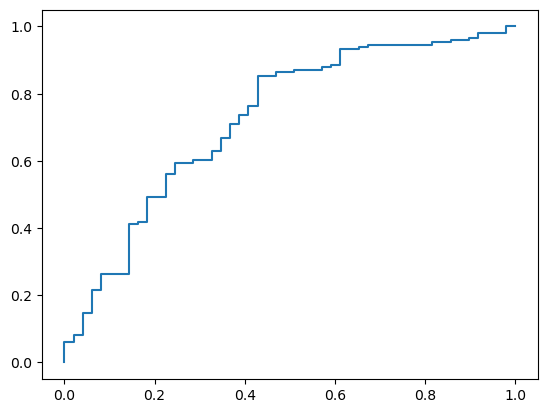

In [50]:
plt.plot(fpr,tpr)

Text(0.5, 0.5, 'Auroc is 73.59')

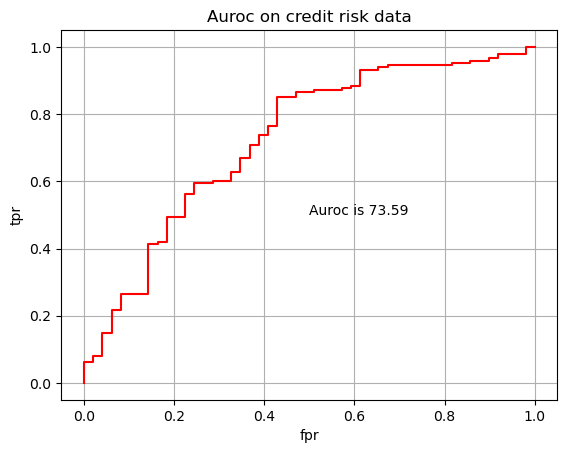

In [51]:
plt.plot(fpr, tpr, color="r")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Auroc on credit risk data')
plt.grid()
plt.text(x= .5, y= .5, s ='Auroc is 73.59')